# Data Monitoring

#### Import libraries and Data File

In [4]:
# importings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#import seaborn as sns
#%matplotlib widget 

##### for countries

In [3]:
import os
import re
file_names = os.listdir('../Data/Splited/Countries/')
pattern = r"^(?!.*-unique_values)(.*)\.csv$"

# Filtered list of names
country_file_names = [name for name in file_names if re.match(pattern, name)]

print(country_file_names)

# List to store extracted country names
country_names = []

# Regular expression pattern to extract country names
pattern = r'^owid-covid-data-clean-(.*)\.csv$'

# Iterate through each filename and extract country names
for filename in country_file_names:
    match = re.match(pattern, filename)
    if match:
        country_name = match.group(1)  # Extracting the captured group
        country_names.append(country_name)

# Print the extracted country names
print(country_names)


['owid-covid-data-clean-Afghanistan.csv', 'owid-covid-data-clean-Albania.csv', 'owid-covid-data-clean-Algeria.csv', 'owid-covid-data-clean-American Samoa.csv', 'owid-covid-data-clean-Andorra.csv', 'owid-covid-data-clean-Angola.csv', 'owid-covid-data-clean-Anguilla.csv', 'owid-covid-data-clean-Antigua and Barbuda.csv', 'owid-covid-data-clean-Argentina.csv', 'owid-covid-data-clean-Armenia.csv', 'owid-covid-data-clean-Aruba.csv', 'owid-covid-data-clean-Australia.csv', 'owid-covid-data-clean-Austria.csv', 'owid-covid-data-clean-Azerbaijan.csv', 'owid-covid-data-clean-Bahamas.csv', 'owid-covid-data-clean-Bahrain.csv', 'owid-covid-data-clean-Bangladesh.csv', 'owid-covid-data-clean-Barbados.csv', 'owid-covid-data-clean-Belarus.csv', 'owid-covid-data-clean-Belgium.csv', 'owid-covid-data-clean-Belize.csv', 'owid-covid-data-clean-Benin.csv', 'owid-covid-data-clean-Bermuda.csv', 'owid-covid-data-clean-Bhutan.csv', 'owid-covid-data-clean-Bolivia.csv', 'owid-covid-data-clean-Bonaire Sint Eustatius 

##### for continents

In [5]:
continent_file_names = os.listdir('../Data/Splited/Continents/')

print("continent_file_names:", continent_file_names)

# List to store extracted country names
continent_names = []

# Regular expression pattern to extract country names
pattern = r'^owid-covid-data-clean-(.*)\.csv$'

# Iterate through each filename and extract country names
for filename in continent_file_names:
    match = re.match(pattern, filename)
    if match:
        continent_name = match.group(1)  # Extracting the captured group
        continent_names.append(continent_name)

# Print the extracted country names
print("continent_names:", continent_names)

continent_file_names: ['owid-covid-data-clean-Africa.csv', 'owid-covid-data-clean-Asia.csv', 'owid-covid-data-clean-Europe.csv', 'owid-covid-data-clean-North America.csv', 'owid-covid-data-clean-Oceania.csv', 'owid-covid-data-clean-South America.csv']
continent_names: ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


## توصیف داده ها

<div style="text-align: right">
ویژگی هایی که در این دادگان هست با توضیحات، عبارت از جدول زیر است:
</div>
<div dir='rtl'>

<div style="text-align: center">

| عنوان ویژگی                    | توضیحات                                 |
| ------------------------------ | --------------------------------------- |
| days_passed                    | روزهای گذشته از آغاز اندازه گیری        |
| new_cases                      | موارد جدید                              |
| total_cases                    | مجموع مبتلایان                          |
| new_cases_smoothed             | موارد جدید اصلاح شده                    |
| total_cases_smoothed           | مجموع مبتلایان اصلاح شده                |
| new_deaths                     | مرگ و میر تازه                          |
| total_deaths                   | مجموع مرگ و میر                         |
| new_deaths_smoothed            | مرگ و میر تازه اصلاح شده                |
| total_deaths_smoothed          | مجموع مرگ و میر اصلاح شده               |
| new_vaccinations_smoothed      | واکسنش های جدید اصلاح شده               |
| total_vaccinations             | مجموع واکسینه شده ها                    |
| total_vaccinations_smooth      | مجموع واکسنش ها اصلاح شده               |
| new_people_vaccinated_smoothed | جمعیت جدیدا واکسینه شده اصلاح شده       |
| total_people_vaccinated        | مجموع جمعیت کاملا واکسینه شده           |
| total_people_vaccinated_smooth | مجموع جمعیت کاملا واکسینه شده اصلاح شده |
| people_fully_vaccinated        | جمعیت کاملا واکسینه شده                 |
| people_fully_vaccinated_smooth | جمعیت کاملا واکسینه شده اصلاح شده       |
| total_boosters                 | مجموع واکسینه شده های ثانویه(بوستر)     |
| total_boosters_smooth          |                                         |
| reproduction_rate              | نرخ تخمینی رشد جمعیت کرونازده ها        |
| stringency_index               | شاخص سختی                               |
| excess_mortality               | درصد تغییرات مرگ ماهانه یا سالانه       |
| icu_patients                   | بیماران مراقبت های ویژه                 |
| hosp_patients                  | بیماران بیمارستانی                      |
| weekly_icu_admissions          | پذیرش هفتگی مهو                         |
| weekly_hosp_admissions         | پذیرش هفتگی بیمارستان                   |

### داده های ایران

In [248]:
IRN_ad = '..\Data\Splited\Countries\owid-covid-data-clean-Iran.csv'
Iran_data = pd.read_csv(IRN_ad)
#Iran_data = covid_raw[ covid_raw["location"] == "Iran" ]

In [249]:
Iran_data.head()

,days_passed,new_cases,total_cases,new_cases_smoothed,total_cases_smoothed,new_deaths,total_deaths,new_deaths_smoothed,total_deaths_smoothed,new_vaccinations_smoothed,...,people_fully_vaccinated_smooth,total_boosters,total_boosters_smooth,reproduction_rate,stringency_index,excess_mortality,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.97,0.0,-6.33,-1.0,-1.0,-1.0,-1.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.97,0.0,-6.33,-1.0,-1.0,-1.0,-1.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.97,0.0,-6.33,-1.0,-1.0,-1.0,-1.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.97,0.0,-6.33,-1.0,-1.0,-1.0,-1.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.97,0.0,-6.33,-1.0,-1.0,-1.0,-1.0


<div style="text-align: right">
برای کشور **ایران** حدود 26 ویژگی و در ۱۲۳۱ روز داده داریم. برای دیگر کشورها نیز مقادیر باید در همین مقیاس باشند.
</div>
<div dir='rtl'>

In [113]:
np.shape(Iran_data)

(1231, 26)

### نمودارهای زمانی

برای آنکه مقیاس و آستانه داده ها را بیابیم، بیشینه مقادیر مبتلایان،  مجموع مرگ و میر و مجموع واکسیناسیون را می‌گیریم. نیز بیشترین نرخ این سه در آمار لحظه ای را.

In [69]:
print(f"All of cases: {max(Iran_data['total_cases'])} ")
print(f"All of deaths: {max(Iran_data['total_deaths'])} ")
print(f"All of vaccinations: {max(Iran_data['total_vaccinations'])} ")

print()
print(f"Max of cases per week/day: {max(Iran_data['new_cases'])} ")
print(f"Max of deaths per week/day: {max(Iran_data['new_deaths'])} ")
print(f"Max of vaccinations per week/day: {max(Iran_data['new_people_vaccinated_smoothed'])} ")


All of cases: 7610676.0 
All of deaths: 146204.0 
All of vaccinations: 155369313.0 

Max of cases per week/day: 269975.0 
Max of deaths per week/day: 4547.0 
Max of vaccinations per week/day: 1225502.0 


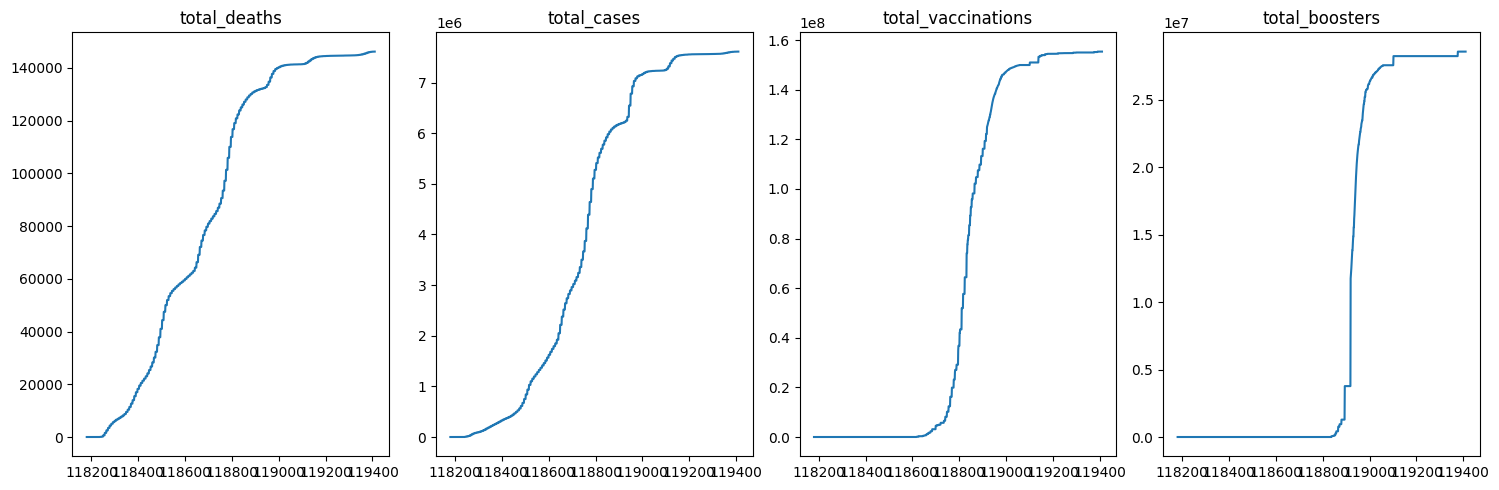

In [26]:
# Generate sample data
y1, y2, y3, y4 = Iran_data["total_deaths"] , Iran_data["total_cases"], Iran_data["total_vaccinations"], Iran_data["total_boosters"]

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot each function and set titles
functions = [(y1, 'total_deaths'), (y2, 'total_cases'), (y3, 'total_vaccinations'), (y4, 'total_boosters')]
for ax, (y, title) in zip(axs, functions):
    ax.plot( y)
    ax.set_title(title)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

نمودارهای فوق نیز شیب رشد شدیدی در آمارها را در میانهٔ بازهٔ اندازه گیری نشان می‌دهند. علل مختلفی می‌توانند ایجاد کننده این شیب باشند.

## مصور سازی داده ها

### مصورسازی داده کشور ها

تابع زیر از لیست کشورهایی که می‌گیرد، تعدادی را به طور تصادفی انتخاب می‌کند و نمودارشان را می‌کشد. نیز همبستگی مرگ و میر و مبتلایان کشور ها را نیز محاسبه می‌کند.

In [240]:
#this function plots the stats of countries which gets and saves them into "Monitored stats" folder
def plot_country_stats(country, read_path=None, save_path= None ):
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Read the country data from the CSV file

    country_data = pd.read_csv(read_path)

    # Plot total statistics
    axs[0].plot(country_data["total_deaths"], label="total_deaths")
    axs[0].plot(country_data["total_cases"], label="total_cases")
    axs[0].plot(country_data["total_vaccinations"], label="total_vaccinations")
    axs[0].plot(country_data["total_boosters"], label="total_boosters")
    axs[0].set_title(f'Total statistics in {country}')
    axs[0].set_xlabel('Days duration')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()

    # Plot daily or weekly statistics
    axs[1].plot(country_data["new_cases"], label="new_cases")
    axs[1].plot(country_data["new_deaths"], label="new_deaths")
    axs[1].plot(country_data["new_people_vaccinated_smoothed"], label="new_people_vaccinated_smoothed")
    axs[1].set_title(f'Daily or weekly statistics in {country}')
    axs[1].set_xlabel('Days duration')
    axs[1].set_ylabel('Frequency')
    axs[1].legend()

    # Calculate correlations
    correlation12 = np.corrcoef(country_data["new_cases"], country_data["new_deaths"])[0, 1]
    correlation13 = np.corrcoef(country_data["new_cases"], country_data["new_people_vaccinated_smoothed"])[0, 1]

    # Display correlation information below the plots
    plt.figtext(0.01, 0.7, f"Correlation (new_cases, new_deaths): {correlation12:.2f}\nCorrelation (new_cases, new_people_vaccinated_smoothed): {correlation13:.2f}", ha='left', transform=axs[0].transAxes)

    fig.suptitle(country, fontsize=16, fontweight='bold', ha='center')

    plt.tight_layout()

    # Save the figure if a save_path is provided
    if save_path:
        plt.savefig(save_path)
        print(f"Figure saved as {save_path}")

    #plt.show()

#plot_country_stats(country_names[0], country_file_names[0], save_path="../Monitored stats/afghanistan_statas.png")


In [9]:
def correlations(read_path):
    country_data = pd.read_csv(read_path)

    # Calculate correlations
    correlation12 = np.corrcoef(country_data["new_cases"], country_data["new_deaths"])[0, 1]
    correlation13 = np.corrcoef(country_data["new_cases"], country_data["new_people_vaccinated_smoothed"])[0, 1]

    return correlation12 , correlation13

In [29]:
# Define dictionaries to store correlations for each country
#CD instans for cases-deaths
#CV instans for cases-vaccinated
CD_corres = {}
CV_corres = {}

# this loop runs the plot_country_stats function for all countries
for i in range(len(country_names)):
    read_path = f'../Data/Splited/Countries/{country_file_names[i]}'
    save_path = f'../Monitored stats/countries/{country_names[i]}_stats.png'
    correlation12, correlation13 = correlations(read_path)
    CD_corres[country_names[i]] = correlation12
    CV_corres[country_names[i]] = correlation13

# Print or save the dictionaries as needed
print("Correlation 12 Dictionary:")
print(CD_corres)
print("\nCorrelation 13 Dictionary:")
print(CV_corres)

C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\haf

Correlation 12 Dictionary:
{'Afghanistan': 0.9050274380963421, 'Albania': 0.726906109419226, 'Algeria': 0.8085940170472141, 'American Samoa': 0.5398683266701493, 'Andorra': 0.31780195741311806, 'Angola': 0.648323975152539, 'Anguilla': 0.3636677911157976, 'Antigua and Barbuda': 0.6162922932252717, 'Argentina': 0.6419951926358628, 'Armenia': 0.7866473491632218, 'Aruba': 0.18629601256512054, 'Australia': 0.7014362032080752, 'Austria': 0.41262952639077305, 'Azerbaijan': 0.8640722835635497, 'Bahamas': 0.47620832227966997, 'Bahrain': 0.4195453265587011, 'Bangladesh': 0.8585202408733079, 'Barbados': 0.671821754217388, 'Belarus': 0.8324318087187426, 'Belgium': 0.3082710549802412, 'Belize': 0.4963395276677607, 'Benin': 0.6933938962129339, 'Bermuda': 0.400983170864674, 'Bhutan': 0.8752902109449675, 'Bolivia': 0.4796237841810235, 'Bonaire Sint Eustatius and Saba': 0.5258935407033936, 'Bosnia and Herzegovina': 0.8683295565385559, 'Botswana': 0.6396331246952425, 'Brazil': 0.7533599782930731, 'Briti

C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\haf

In [30]:
CD_corres = [value for value in CD_corres.values() if not np.isnan(value)]
CD_corres_mean = np.mean(CD_corres)

CV_corres = [value for value in CV_corres.values() if not np.isnan(value)]
CV_corres_mean = np.mean(CV_corres)

print("CD_corres_mean: " , CD_corres_mean)
print("CV_corres_mean: " , CV_corres_mean)

CD_corres_mean:  0.6075472643204296
CV_corres_mean:  0.0660480010356182


Figure saved as ../Monitored stats/countries/Afghanistan_stats.png
Figure saved as ../Monitored stats/countries/Albania_stats.png
Figure saved as ../Monitored stats/countries/Algeria_stats.png


C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hafez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Figure saved as ../Monitored stats/countries/American Samoa_stats.png
Figure saved as ../Monitored stats/countries/Andorra_stats.png
Figure saved as ../Monitored stats/countries/Angola_stats.png
Figure saved as ../Monitored stats/countries/Anguilla_stats.png
Figure saved as ../Monitored stats/countries/Antigua and Barbuda_stats.png
Figure saved as ../Monitored stats/countries/Argentina_stats.png
Figure saved as ../Monitored stats/countries/Armenia_stats.png
Figure saved as ../Monitored stats/countries/Aruba_stats.png


KeyboardInterrupt: 

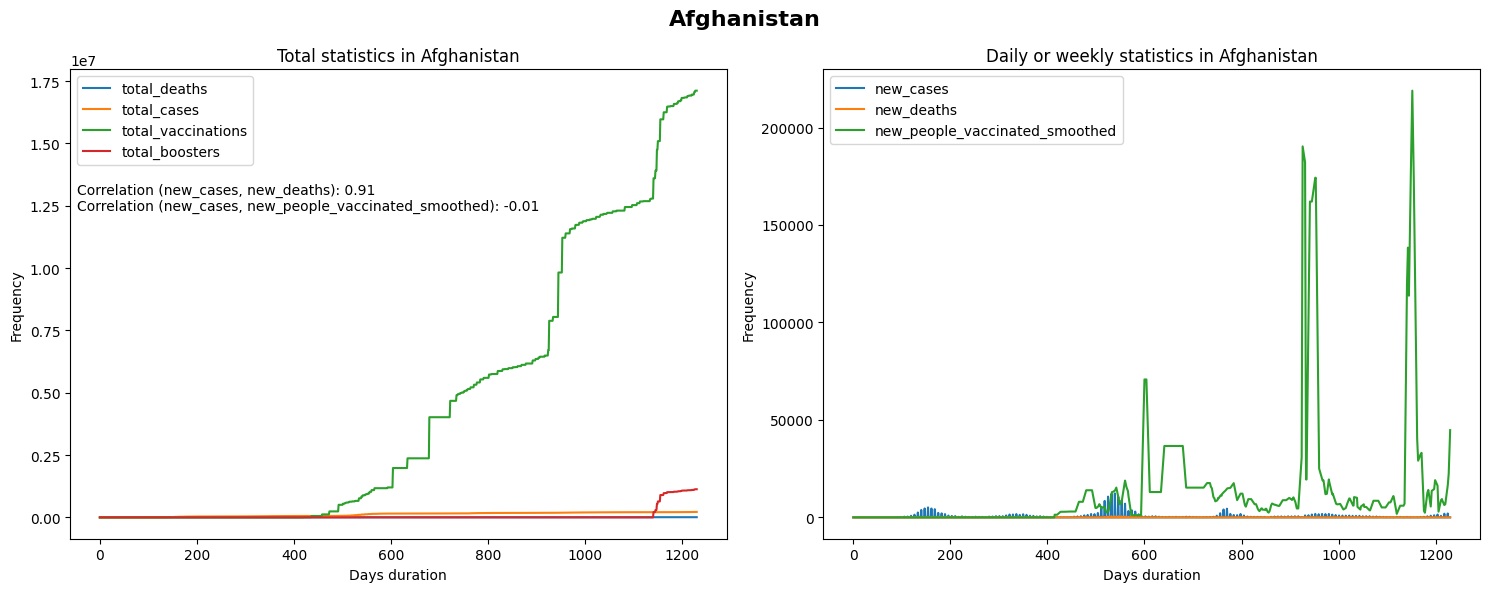

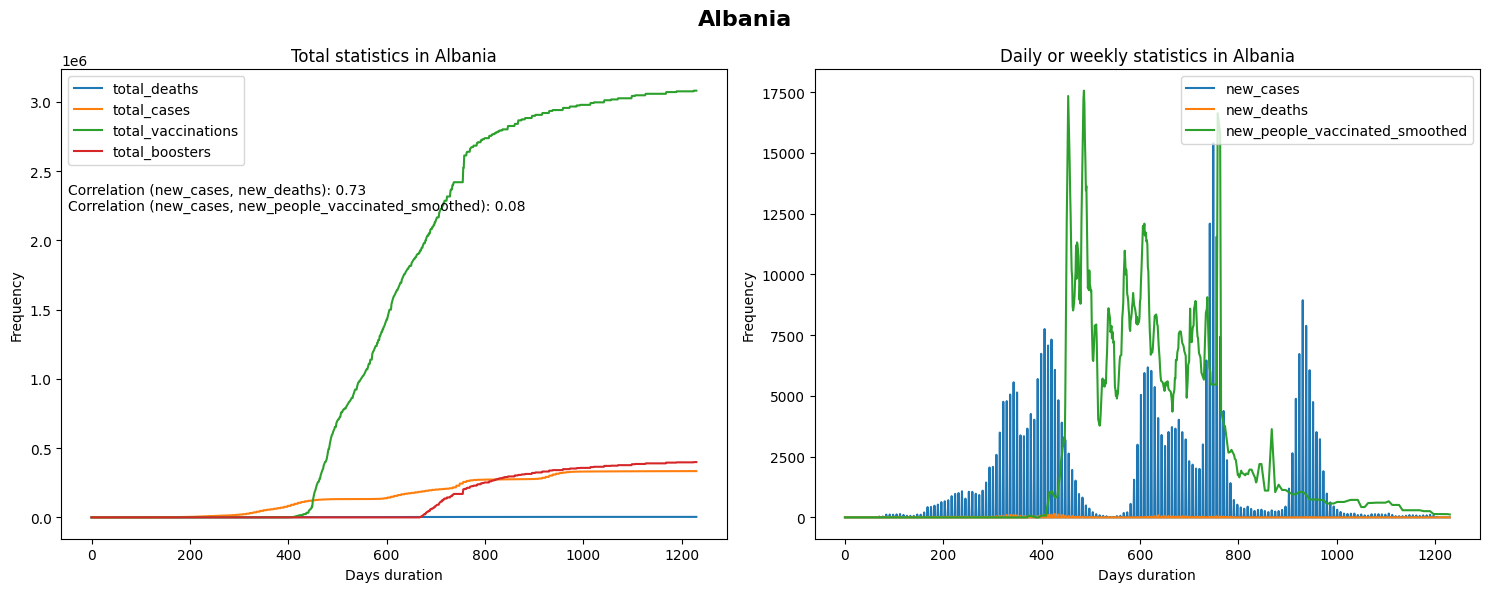

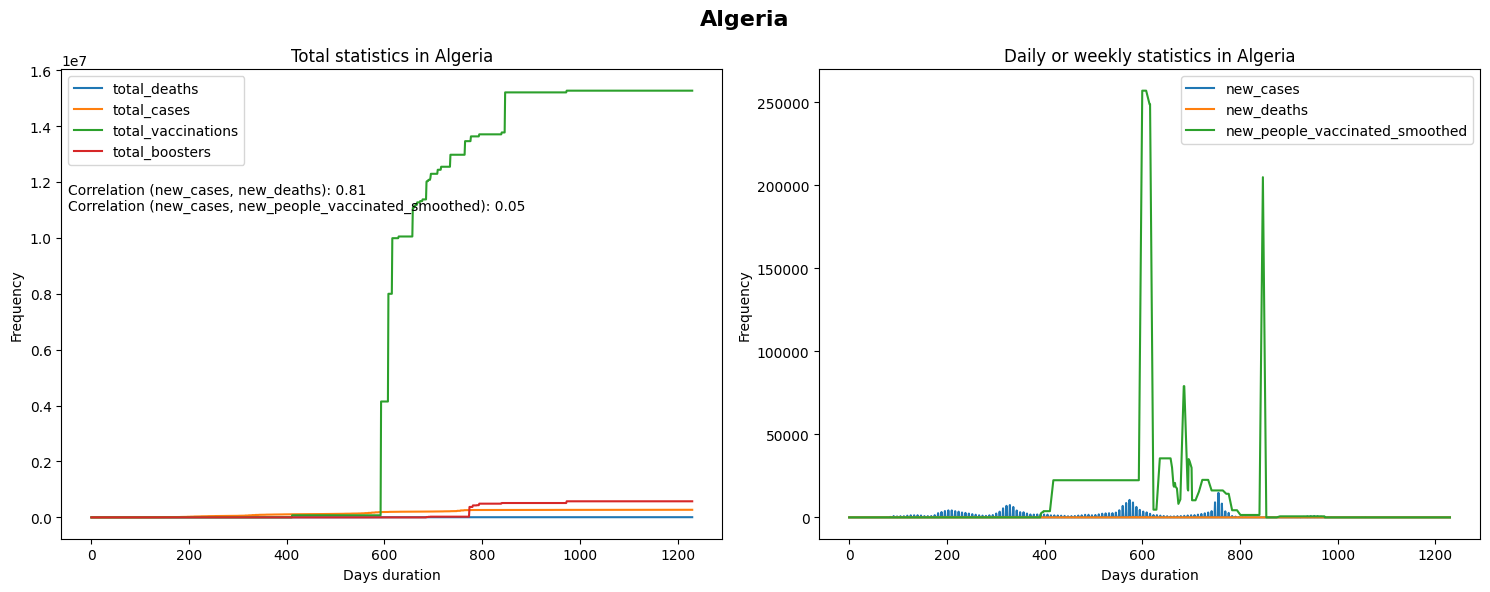

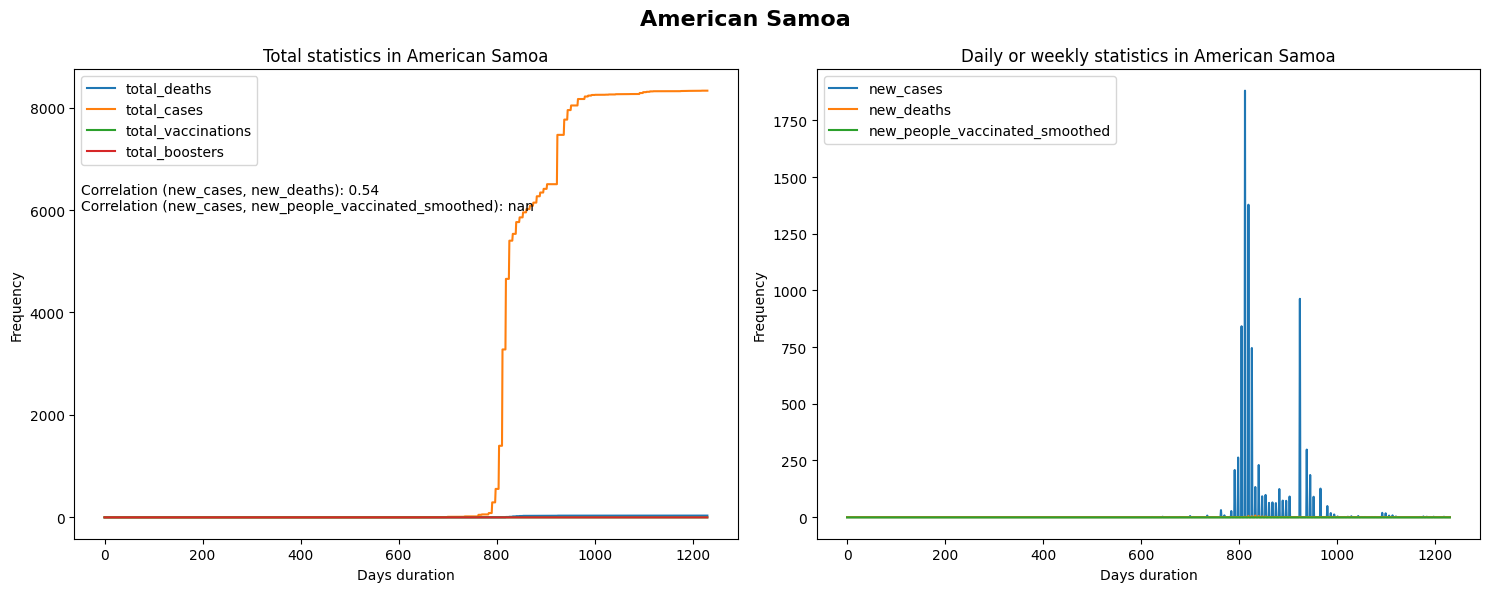

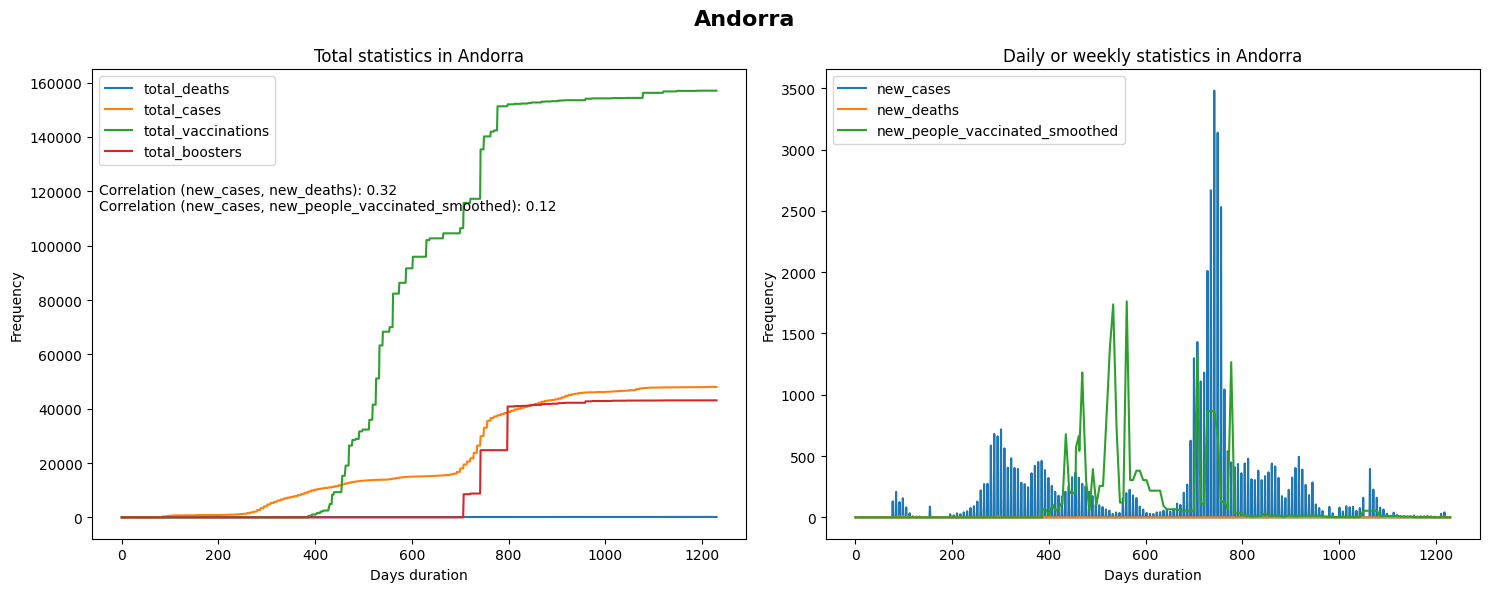

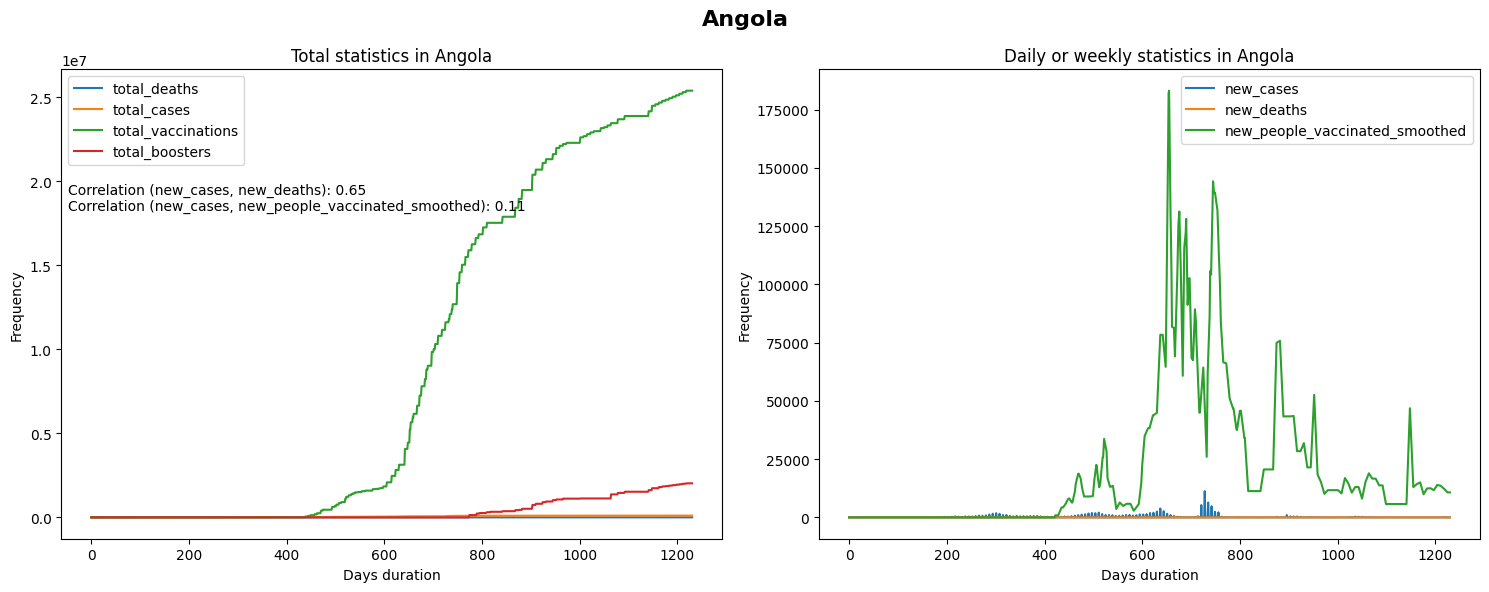

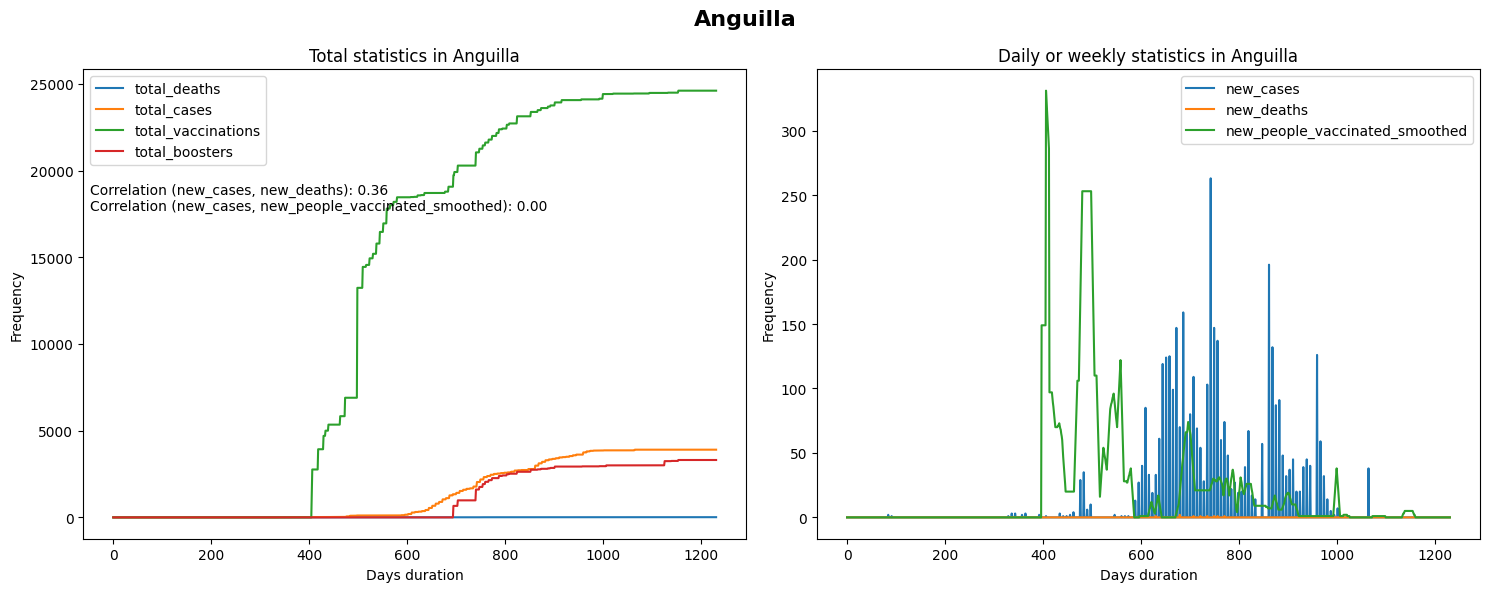

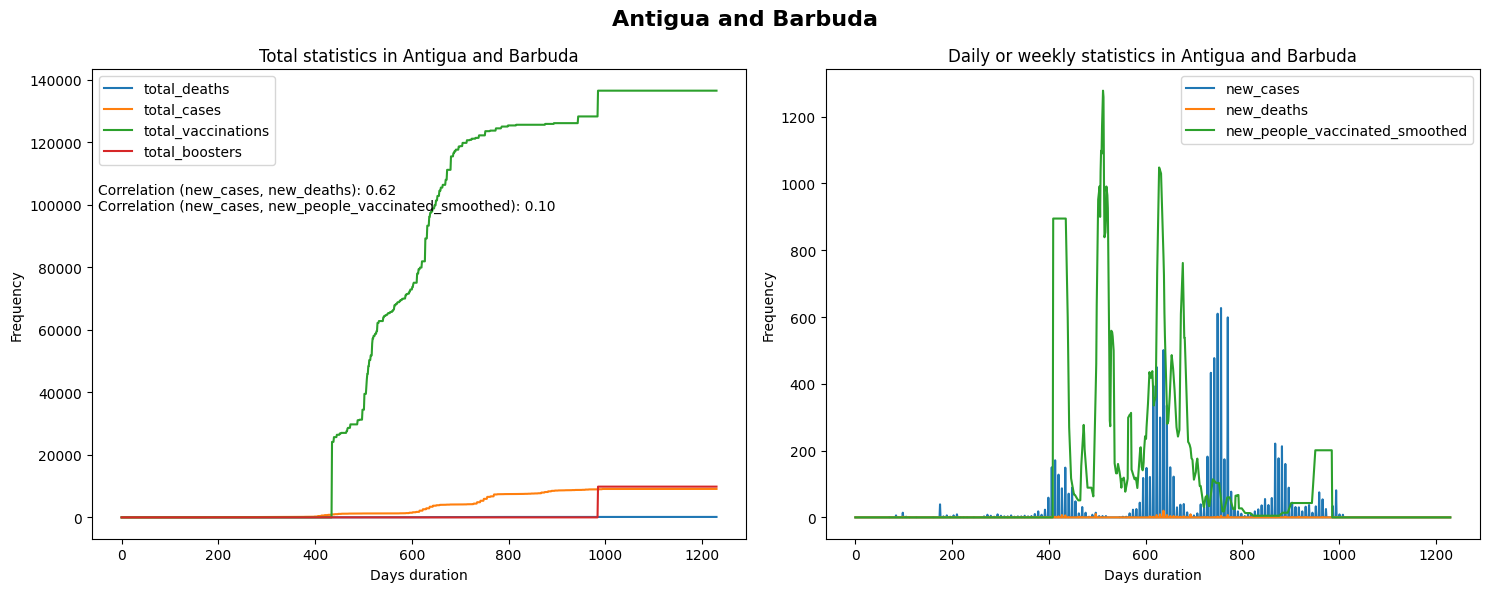

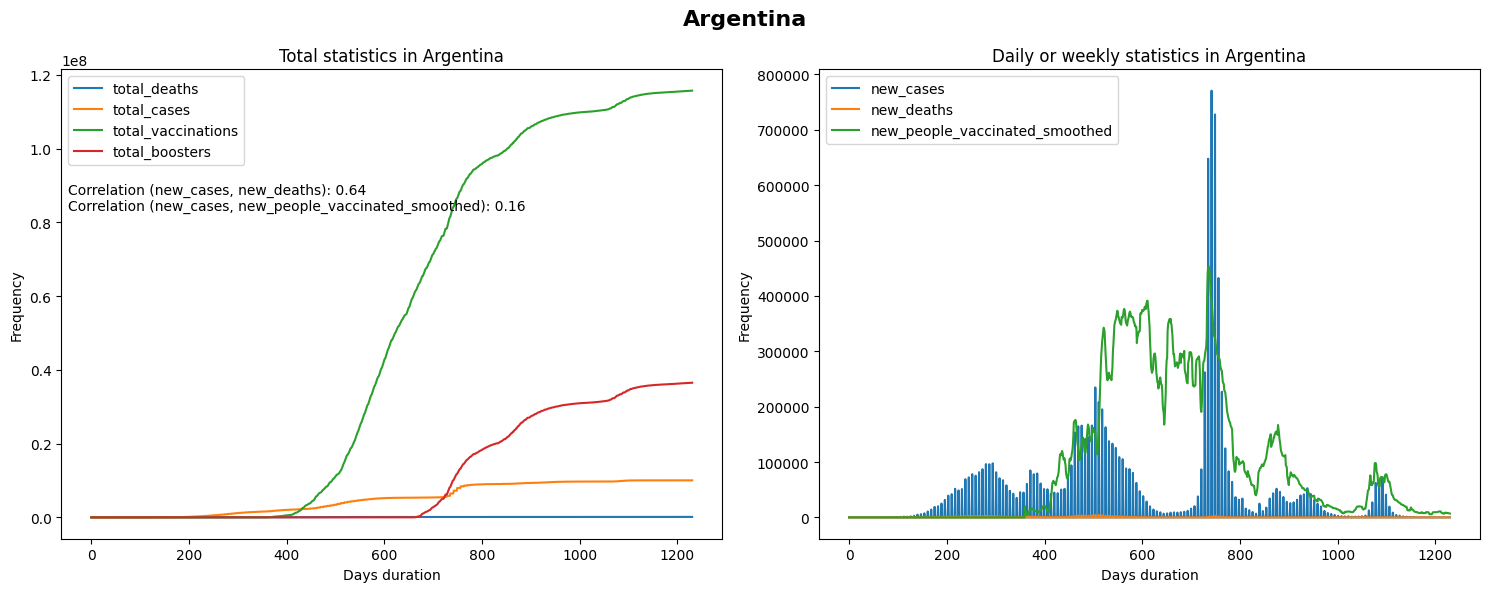

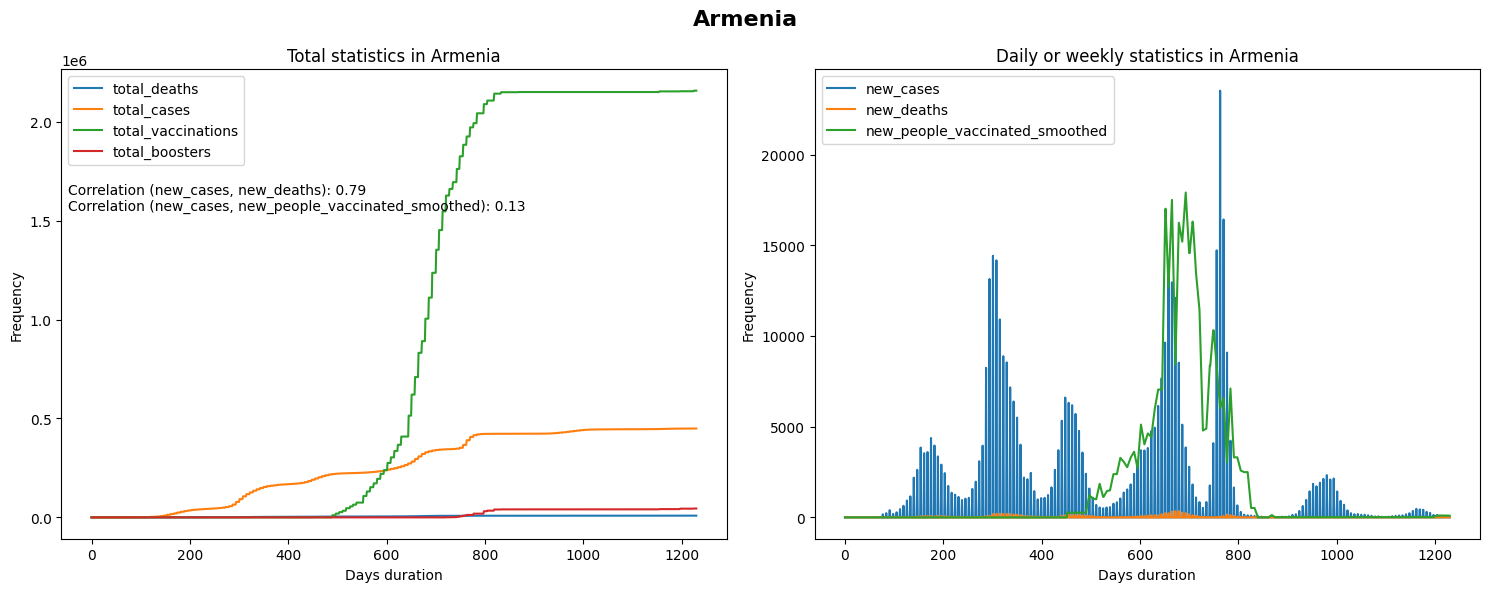

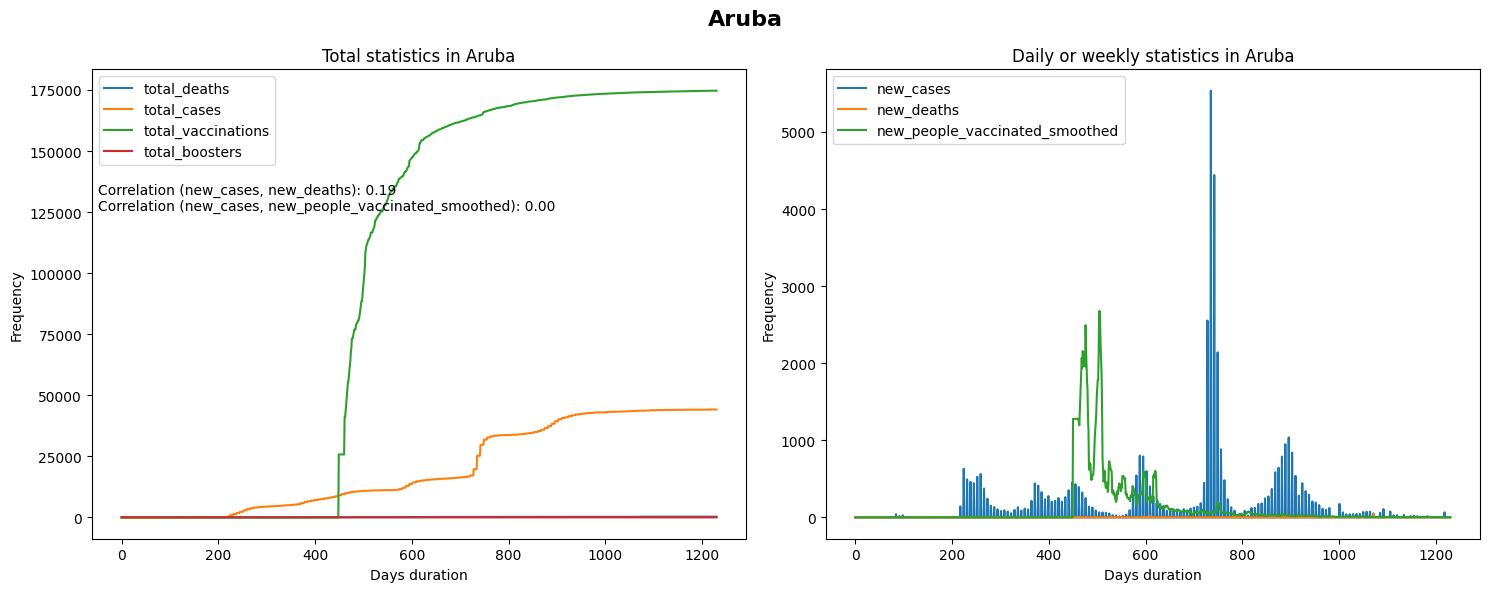

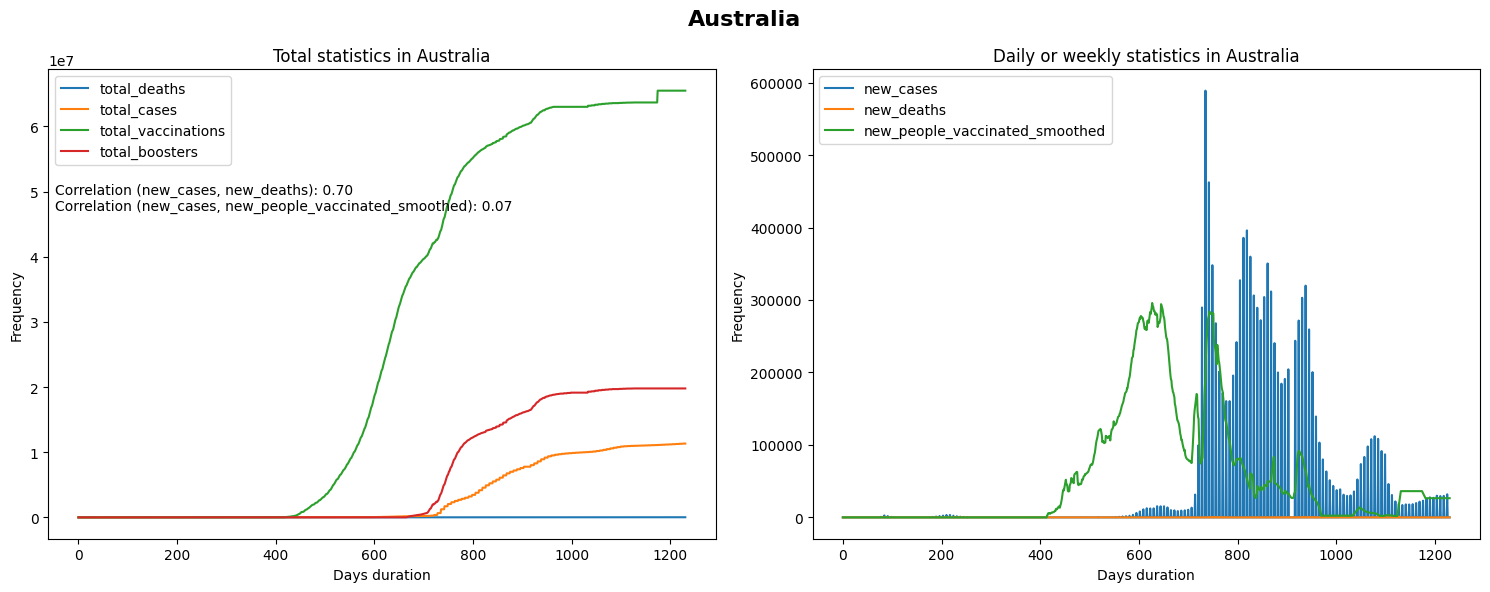

In [245]:
# this loop runs the plot_country_stats function for all countries
for i in range(np.size(country_names)):
    read_path = f'../Data/Splited/Countries/{country_file_names[i]}'
    save_path = f'../Monitored stats/countries/{country_names[i]}_stats.png'
    plot_country_stats(country_names[i], read_path=read_path, save_path=save_path)

### مصورسازی داده قاره ها

تابع زیر نام قاره را می‌گیرد و همان کار های تابع پیش را برای آن قاره می‌کند.

Figure saved as ../Monitored stats/continents/Africa_stats.png
Figure saved as ../Monitored stats/continents/Asia_stats.png
Figure saved as ../Monitored stats/continents/Europe_stats.png
Figure saved as ../Monitored stats/continents/North America_stats.png
Figure saved as ../Monitored stats/continents/Oceania_stats.png
Figure saved as ../Monitored stats/continents/South America_stats.png


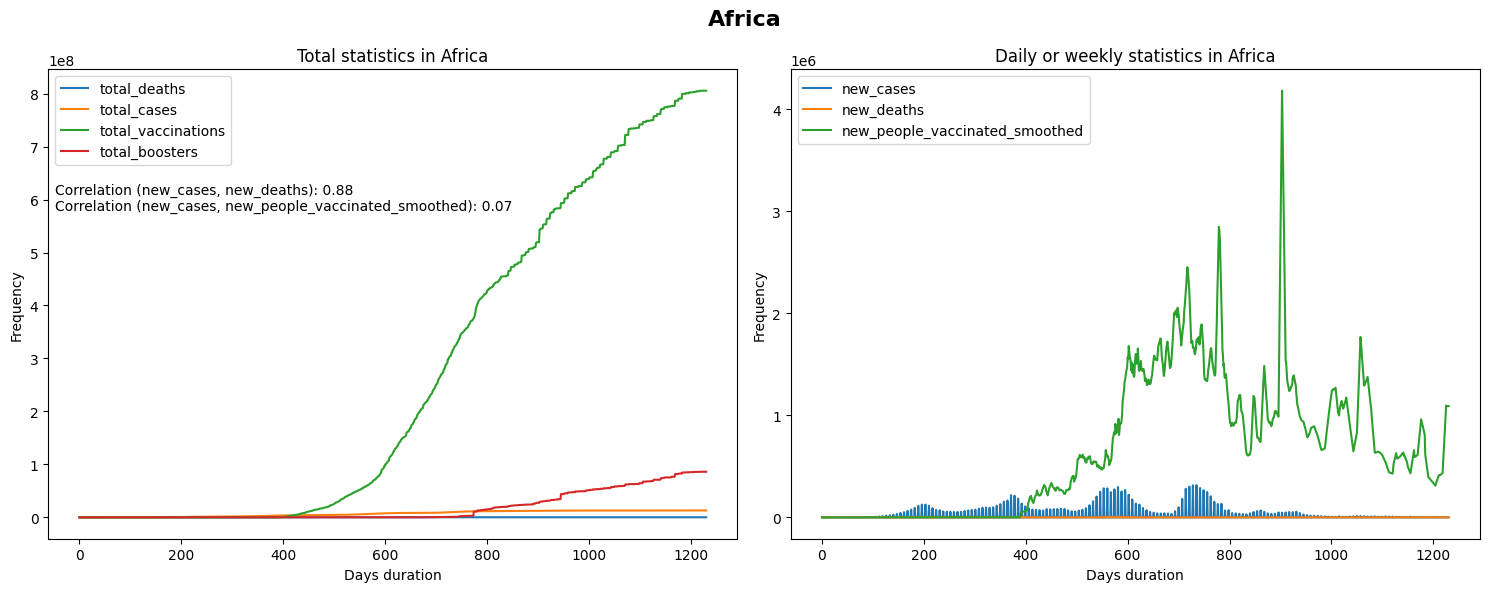

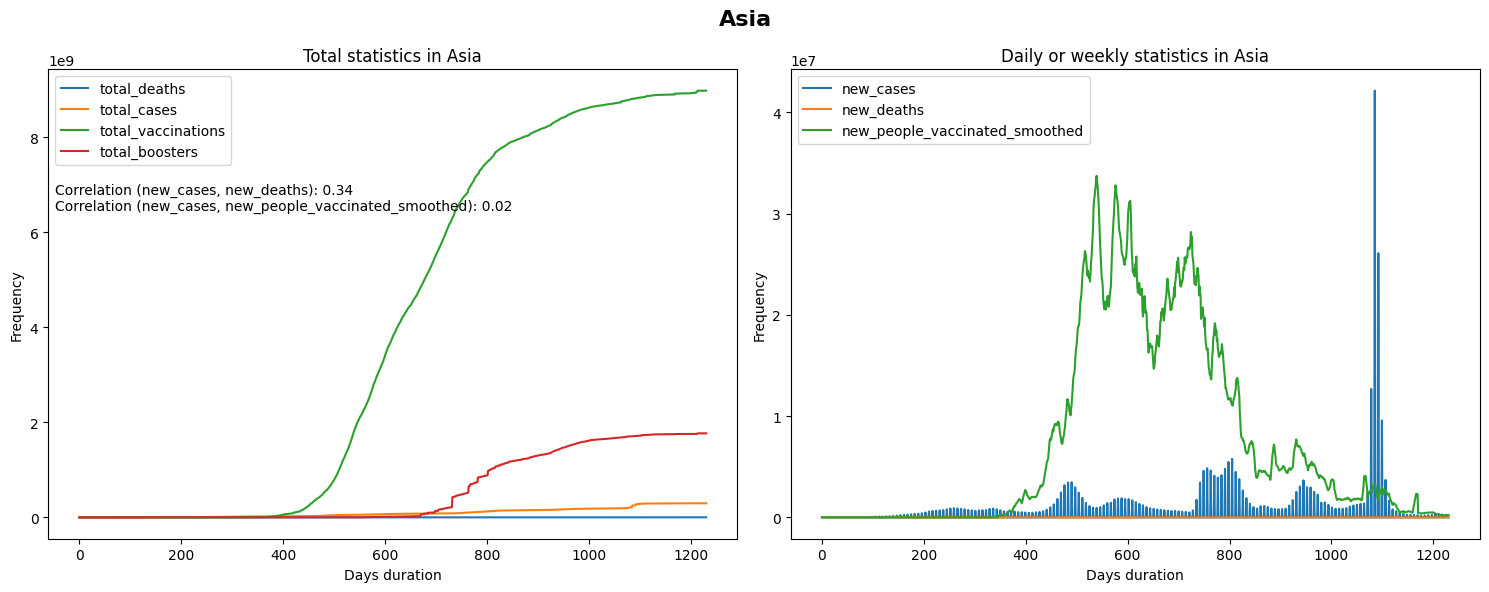

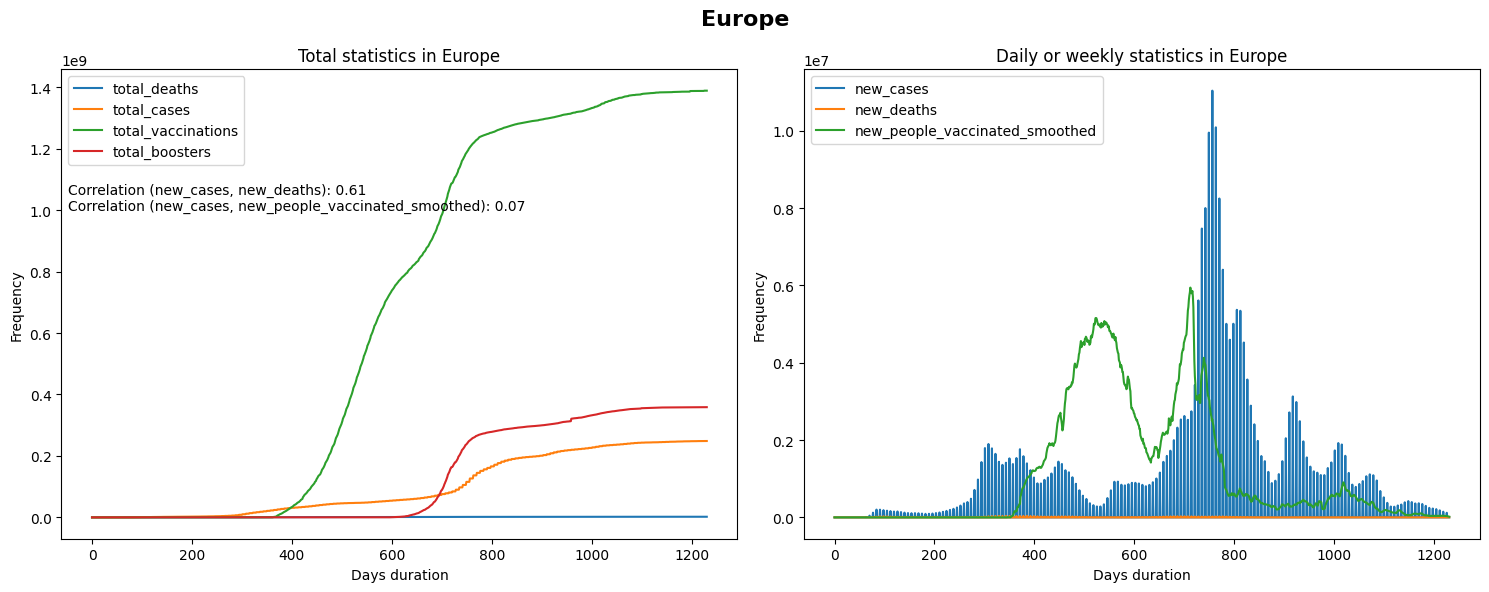

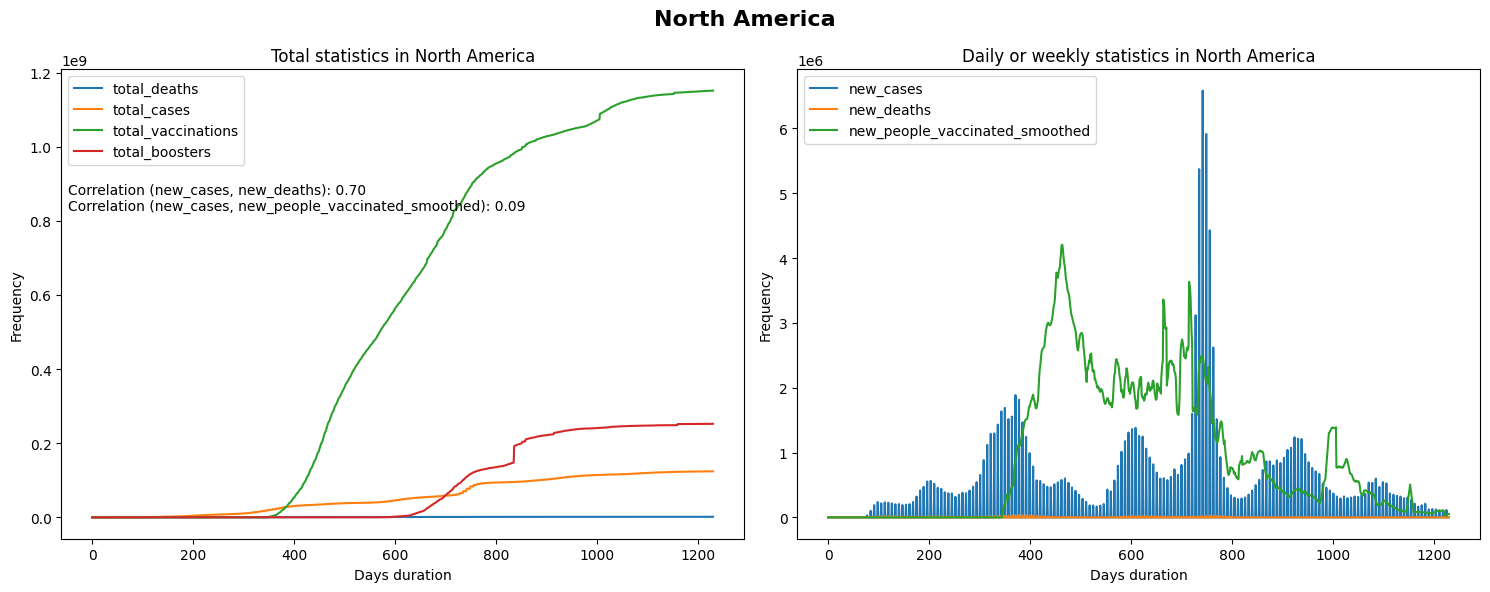

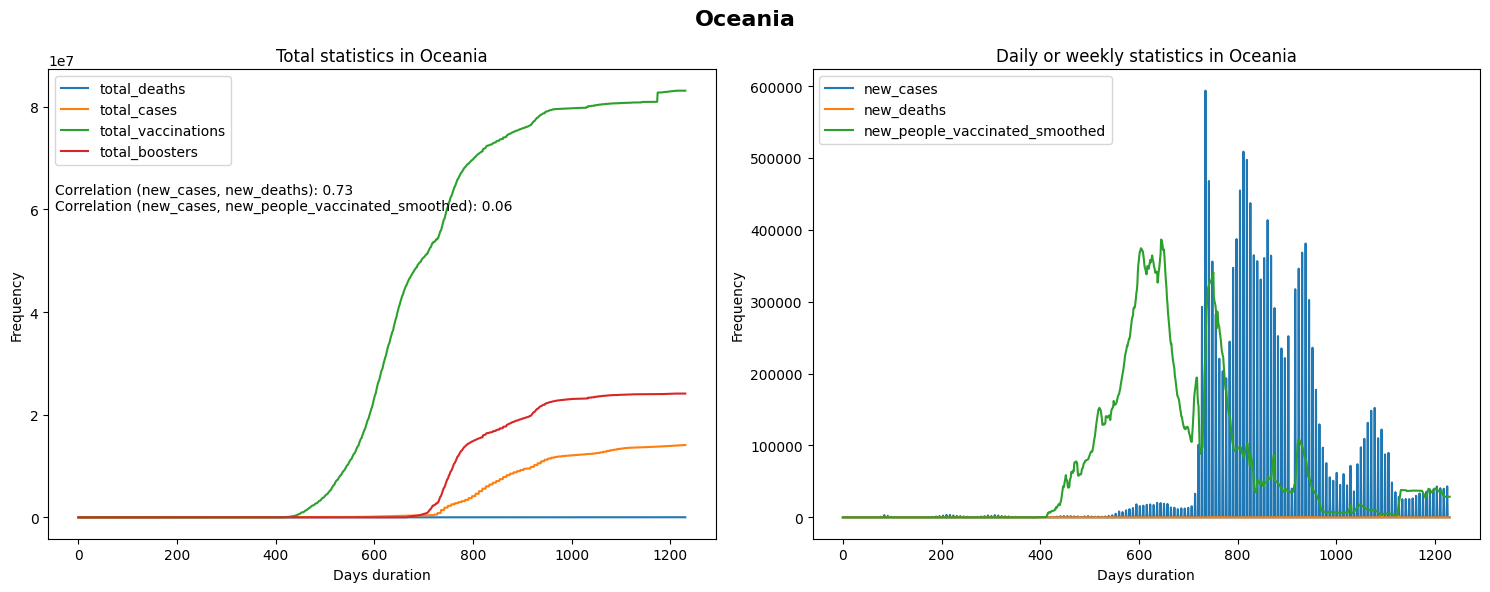

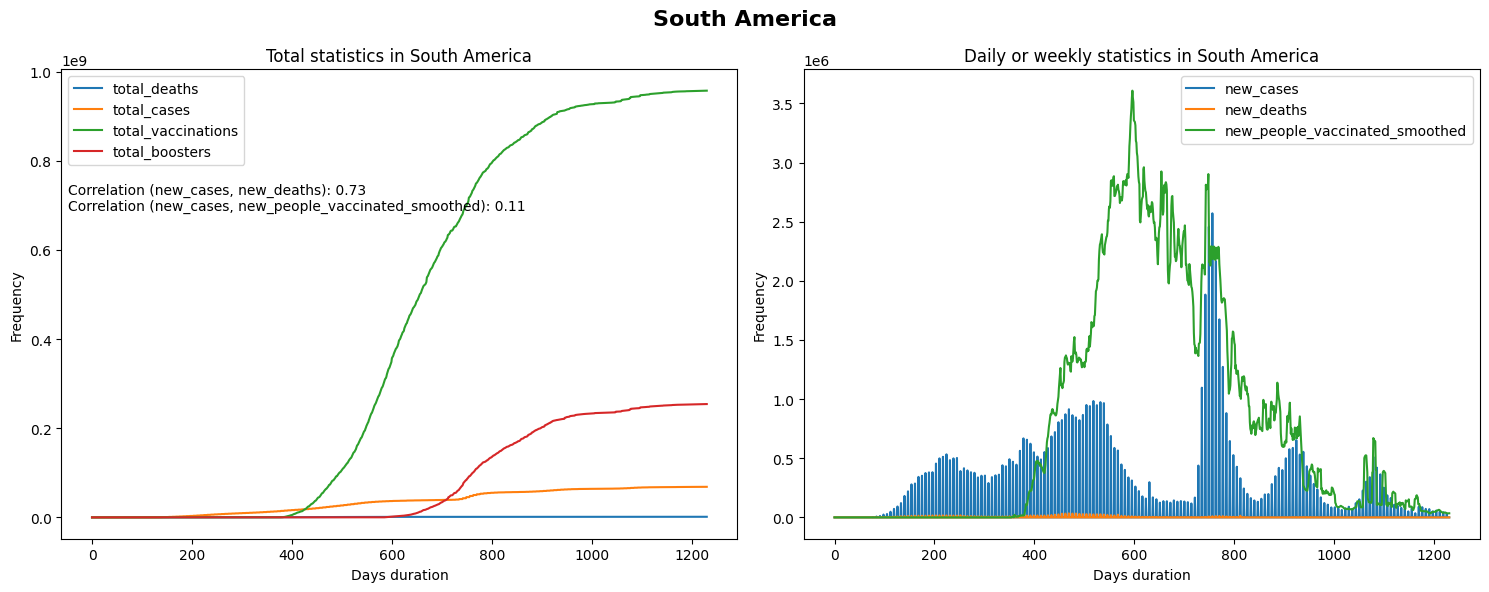

In [247]:
#save_path = f'../Monitored stats/countries

# this loop runs the plot_country_stats function for all CONTINENTS
for i in range(np.size(continent_names)):
    read_path = f'../Data/Splited/Continents/{continent_file_names[i]}'
    save_path = f'../Monitored stats/continents/{continent_names[i]}_stats.png'
    plot_country_stats(continent_names[i], read_path=read_path, save_path=save_path)
